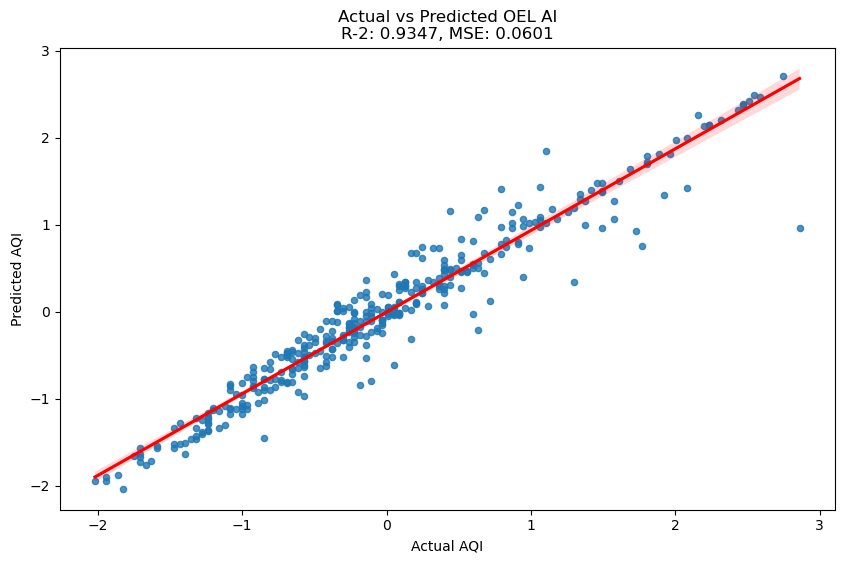

R-squared (R2): 0.9347
Mean Squared Error (MSE): 0.0601


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\mohsi\\Downloads\\daily_air.csv")

independent_features = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']
dependent_feature = 'AQI'

X = df[independent_features]
y = df[dependent_feature]

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20},line_kws= {'color':'red'})
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted OEL AI\nR-2: {r2:.4f}, MSE: {mse:.4f}')
plt.show()

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



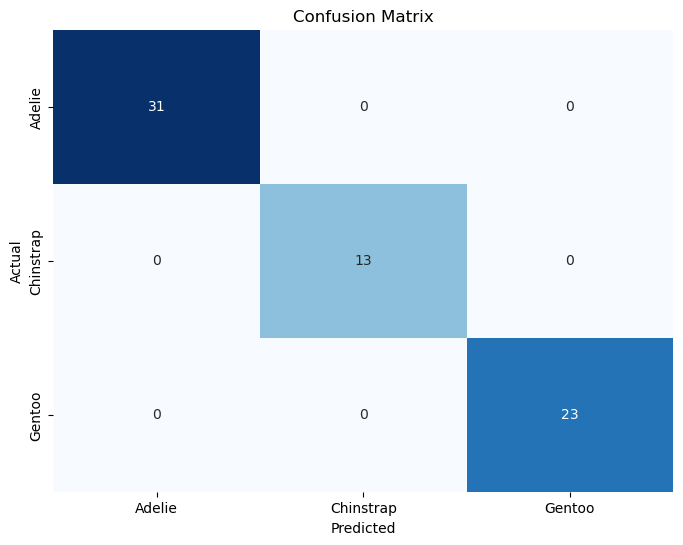

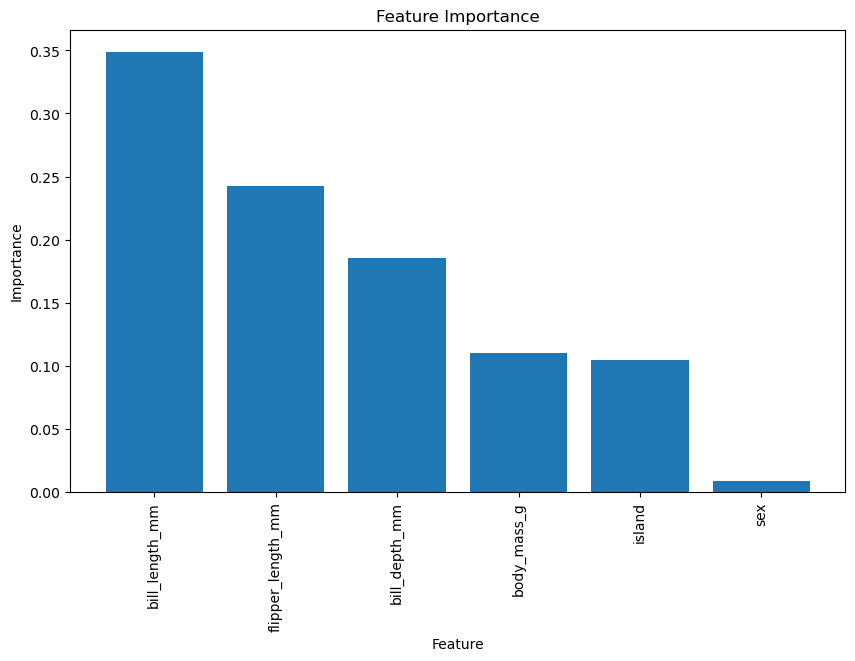

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Displaying additional metrics
report = classification_report(y_test, y_pred, target_names=le.classes_)
print('Classification Report:\n', report)

plt.show()

# Feature Importance
feature_importance = clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
